In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import DistanceMetric
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist

#### Добавление датасета в Юпитер

In [2]:
df = pd.read_csv('4heart2.csv', delimiter = ',')

#### Вывод первых 20 строк датасета

In [3]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


#### Вывод столбцов датасета

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### Перевод столбцов в нижний регистр

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

#### Проверка на пустые строки. 
Так как пустые строки отсутствуют, то оставляем все как есть

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

#### Проверка на наличие явных дубликатов. 
Явные дубликаты также отсутствуют

In [8]:
df.duplicated().sum()

0

#### Проверка на наличие неявных дубликатов.
В столбце возраст было найдено десятичное число, оно было заменено на целое, так как возраст не может быть выражен десятичным числом

In [9]:
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [10]:
df.loc[df['age']== 60.667, 'age'] = 70

In [11]:
df['age'].unique()

array([75., 55., 65., 50., 90., 60., 80., 62., 45., 49., 82., 87., 70.,
       48., 68., 53., 95., 58., 94., 85., 69., 72., 51., 57., 42., 41.,
       67., 79., 59., 44., 63., 86., 66., 43., 46., 61., 81., 52., 64.,
       40., 73., 77., 78., 54., 47., 56.])

Изменяем тип данных у столбца с возрастом на целочисленный

In [12]:
df[['age']] = df[['age']].astype(np.int64)

#### Выводим информацию о датасете. 
По представленным данным можно увидеть, что датасет включает в себя 13 солбцов и 299 значений, значения platelets и serum_creatinine являются вещественными, остальнве значения являются целочисленными

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


#### Описание датасета. 
По полученным данным можно увидеть, что средний возраст пациентов с заболеванием сердца составляет около 60 лет, минимальный возраст составляет 40 лет, а максимальный 95.

In [14]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.896321,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.918316,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Кластеризация иерархическим агломеративным методом. Построение дендограммы.
Суть иерархической кластеризации: задаем функцию расстояния, затем вычисляем матрицу расстояний между всеми объектами, в
ячейках которой будет попарное расстояние между двумя объектами, также ещё учтены все признаки объектов, а не только два.

[[234.         239.           0.62372813   2.        ]
 [146.         157.           0.72131167   2.        ]
 [274.         293.           0.72191402   2.        ]
 ...
 [570.         589.          19.36789236  68.        ]
 [593.         594.          22.67354706 220.        ]
 [592.         595.          26.67893879 299.        ]]


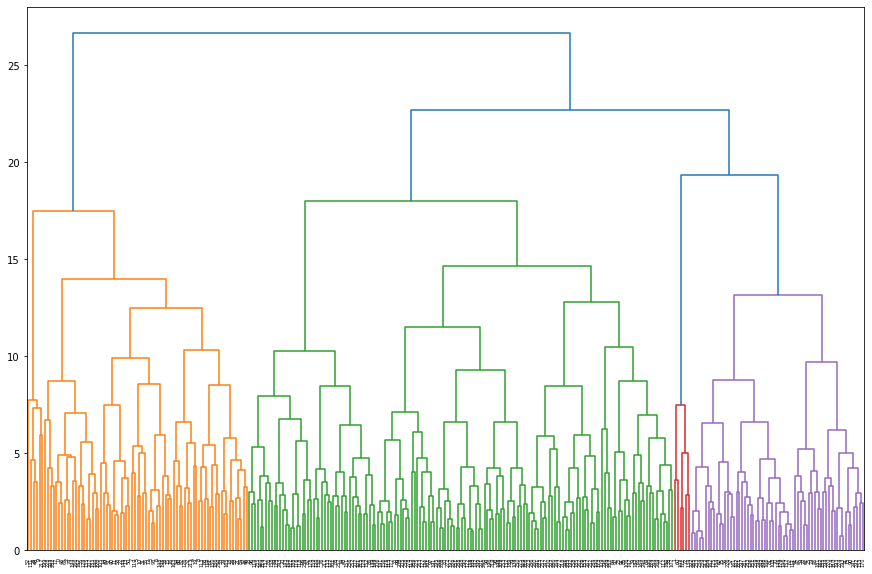

In [15]:
dfForScaler = df.copy()
dfForScaler = dfForScaler.drop(['death_event'], axis=1)
sc = StandardScaler()
X_sc = sc.fit_transform(df)
linked = linkage(X_sc, method = 'ward')
print(linked)
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.xticks(rotation=90)
plt.show()

На основе дендограммы можно сделать вывод, что для метода К-средних задаем число кластеров равное 4.

#### Метод K-Means.
K-Means группирует объекты пошагово. Алгоритм основан на
предположении, что число кластеров (групп) заранее известно. Это довольно
сильное допущение, и часто выбор оптимального количества кластеров
заслуживает решения отдельных задач.

#### Метрику силуэтов.
Метрика силуэта показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой. 

In [16]:
km = KMeans(4)
km.fit(dfForScaler, dfForScaler.columns.to_list()[0])
np.unique(km.labels_)
print(silhouette_score(X_sc, km.labels_))

0.021611792568244


#### Метрика расстояний.
Метрика расстояний (Евклидова метрика) — метрика в евклидовом пространстве — расстояние между двумя точками евклидова пространства, вычисляемое по теореме Пифагора.

In [17]:
dist = DistanceMetric.get_metric('euclidean')
dist.pairwise(dfForScaler)

array([[     0.        ,   7461.94827916, 103000.92333741, ...,
        477002.37119768, 125013.7195001 , 130000.88170889],
       [  7461.94827916,      0.        , 101651.22697499, ...,
        478677.19981275, 123478.57896239, 131865.22819429],
       [103000.92333741, 101651.22697499,      0.        , ...,
        580003.22319902,  22118.19755337, 233000.17313961],
       ...,
       [477002.37119768, 478677.19981275, 580003.22319902, ...,
             0.        , 602000.10390727, 347005.00688411],
       [125013.7195001 , 123478.57896239,  22118.19755337, ...,
        602000.10390727,      0.        , 255009.63747286],
       [130000.88170889, 131865.22819429, 233000.17313961, ...,
        347005.00688411, 255009.63747286,      0.        ]])

#### График важности характеристик.
На основе данного графика можно увидеть, что наибольшие значения имеют: platelets, time и serum_sodium.

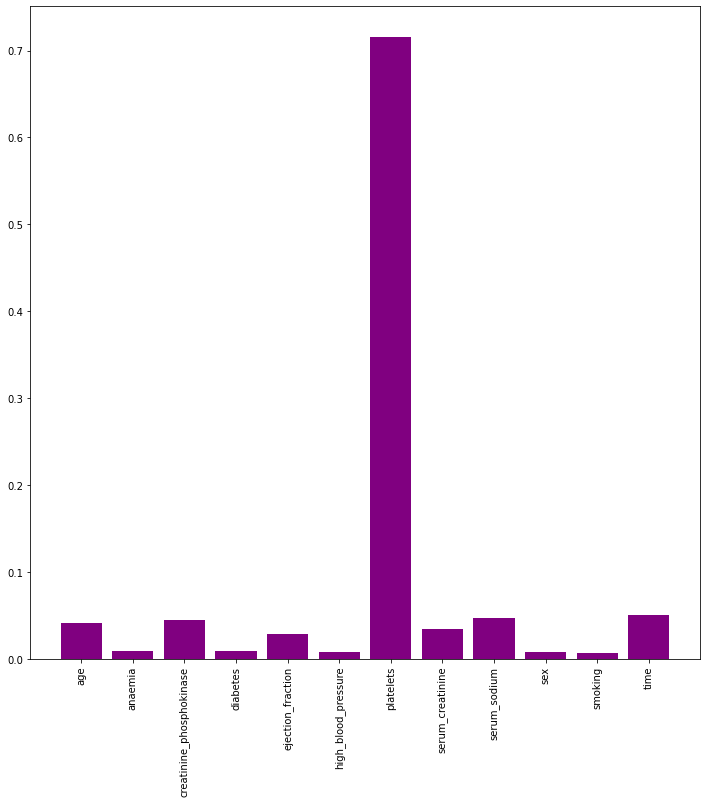

In [18]:
dfForGraph = df
dfForGraph = dfForGraph.drop(columns='death_event') 
km2 = KMeans(4)
km2.fit(df)

clf = RandomForestClassifier()
clf.fit(dfForGraph, km2.labels_)

plt.figure(figsize=(12,12))
plt.bar(dfForGraph.columns, clf.feature_importances_, color = "purple")
plt.xticks(rotation=90)

plt.show()

#### Метрика силуэта для кластеров от 2 до 10.

In [19]:
for i in range(2, 10):
    km = KMeans(i)
    km.fit(dfForScaler, dfForScaler.columns.to_list()[0])
    np.unique(km.labels_)
    print(silhouette_score(X_sc, km.labels_))

0.07816031863563926
0.02779897694014863
0.021611792568244
0.0019028449489952525
-0.0013474283022859499
-0.008889781949159112
-0.011707294827633767
-0.01653228279104504


Исходя из полученных данных можно сделать вывод, что 2 кластеров будет достаточно при использовании метода K-Means.

#### Евклидово расстояние между кластерами.

In [20]:
euclidean_distances(dfForScaler)

array([[     0.        ,   7461.94827916, 103000.92333741, ...,
        477002.37119768, 125013.7195001 , 130000.88170889],
       [  7461.94827916,      0.        , 101651.22697499, ...,
        478677.19981275, 123478.57896239, 131865.22819429],
       [103000.92333741, 101651.22697499,      0.        , ...,
        580003.22319902,  22118.19755337, 233000.17313961],
       ...,
       [477002.37119768, 478677.19981275, 580003.22319902, ...,
             0.        , 602000.10390727, 347005.00688411],
       [125013.7195001 , 123478.57896239,  22118.19755337, ...,
        602000.10390727,      0.        , 255009.63747286],
       [130000.88170889, 131865.22819429, 233000.17313961, ...,
        347005.00688411, 255009.63747286,      0.        ]])

#### Объекты, относящиеся к каждому кластеру.

In [21]:
sc = StandardScaler()
X_sc = sc.fit_transform(dfForScaler)
km = KMeans(n_clusters=2, random_state=0)
labels = km.fit_predict(X_sc)
print(labels)

[0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 0 0]


#### Сводная таблица.
На основе данной таблицы можно сделать вывод, что у первого кластера уровень фермента КФК в крови намного выше, чем у второго, количество людей, болеющих диабетом больше у второго кластера, также можно заметить, что количество курящих людей больше у первого кластера.

In [22]:
df["Clusters"] = labels
data_pivot = pd.pivot_table(
    df,
    index='Clusters',
    values=df, 
    aggfunc=np.mean)
data_pivot

,age,anaemia,creatinine_phosphokinase,death_event,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
Clusters,,,,,,,,,,,,,
0,61.520833,0.395833,643.395833,0.322917,0.354167,36.552083,0.307292,253473.065000,1.404375,136.520833,1.000000,0.479167,129.338542
1,59.775701,0.495327,471.383178,0.317757,0.532710,40.831776,0.429907,281095.535234,1.375047,136.813084,0.018692,0.037383,131.915888


#### Метод локтя.
Метод локтя – один из самых известных методов, с помощью которого можно найти количество кластеров и повысить производительность. Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение.

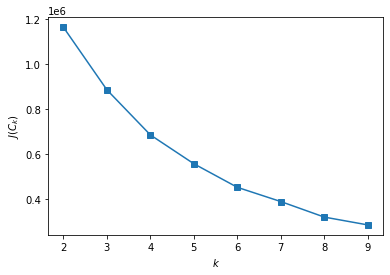

In [23]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(dfForScaler)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(2, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

#### Точечная диаграмма.
Исходя из данной диаграммы можно сделать вывод, что при увеличении длительности наблюдения за пациентом увеличивается креатин сыворотки, натрий сыворотки, тромбоциты и фракция выброса. Также можно заметить увеличение данных параметров с увеличением возраста.

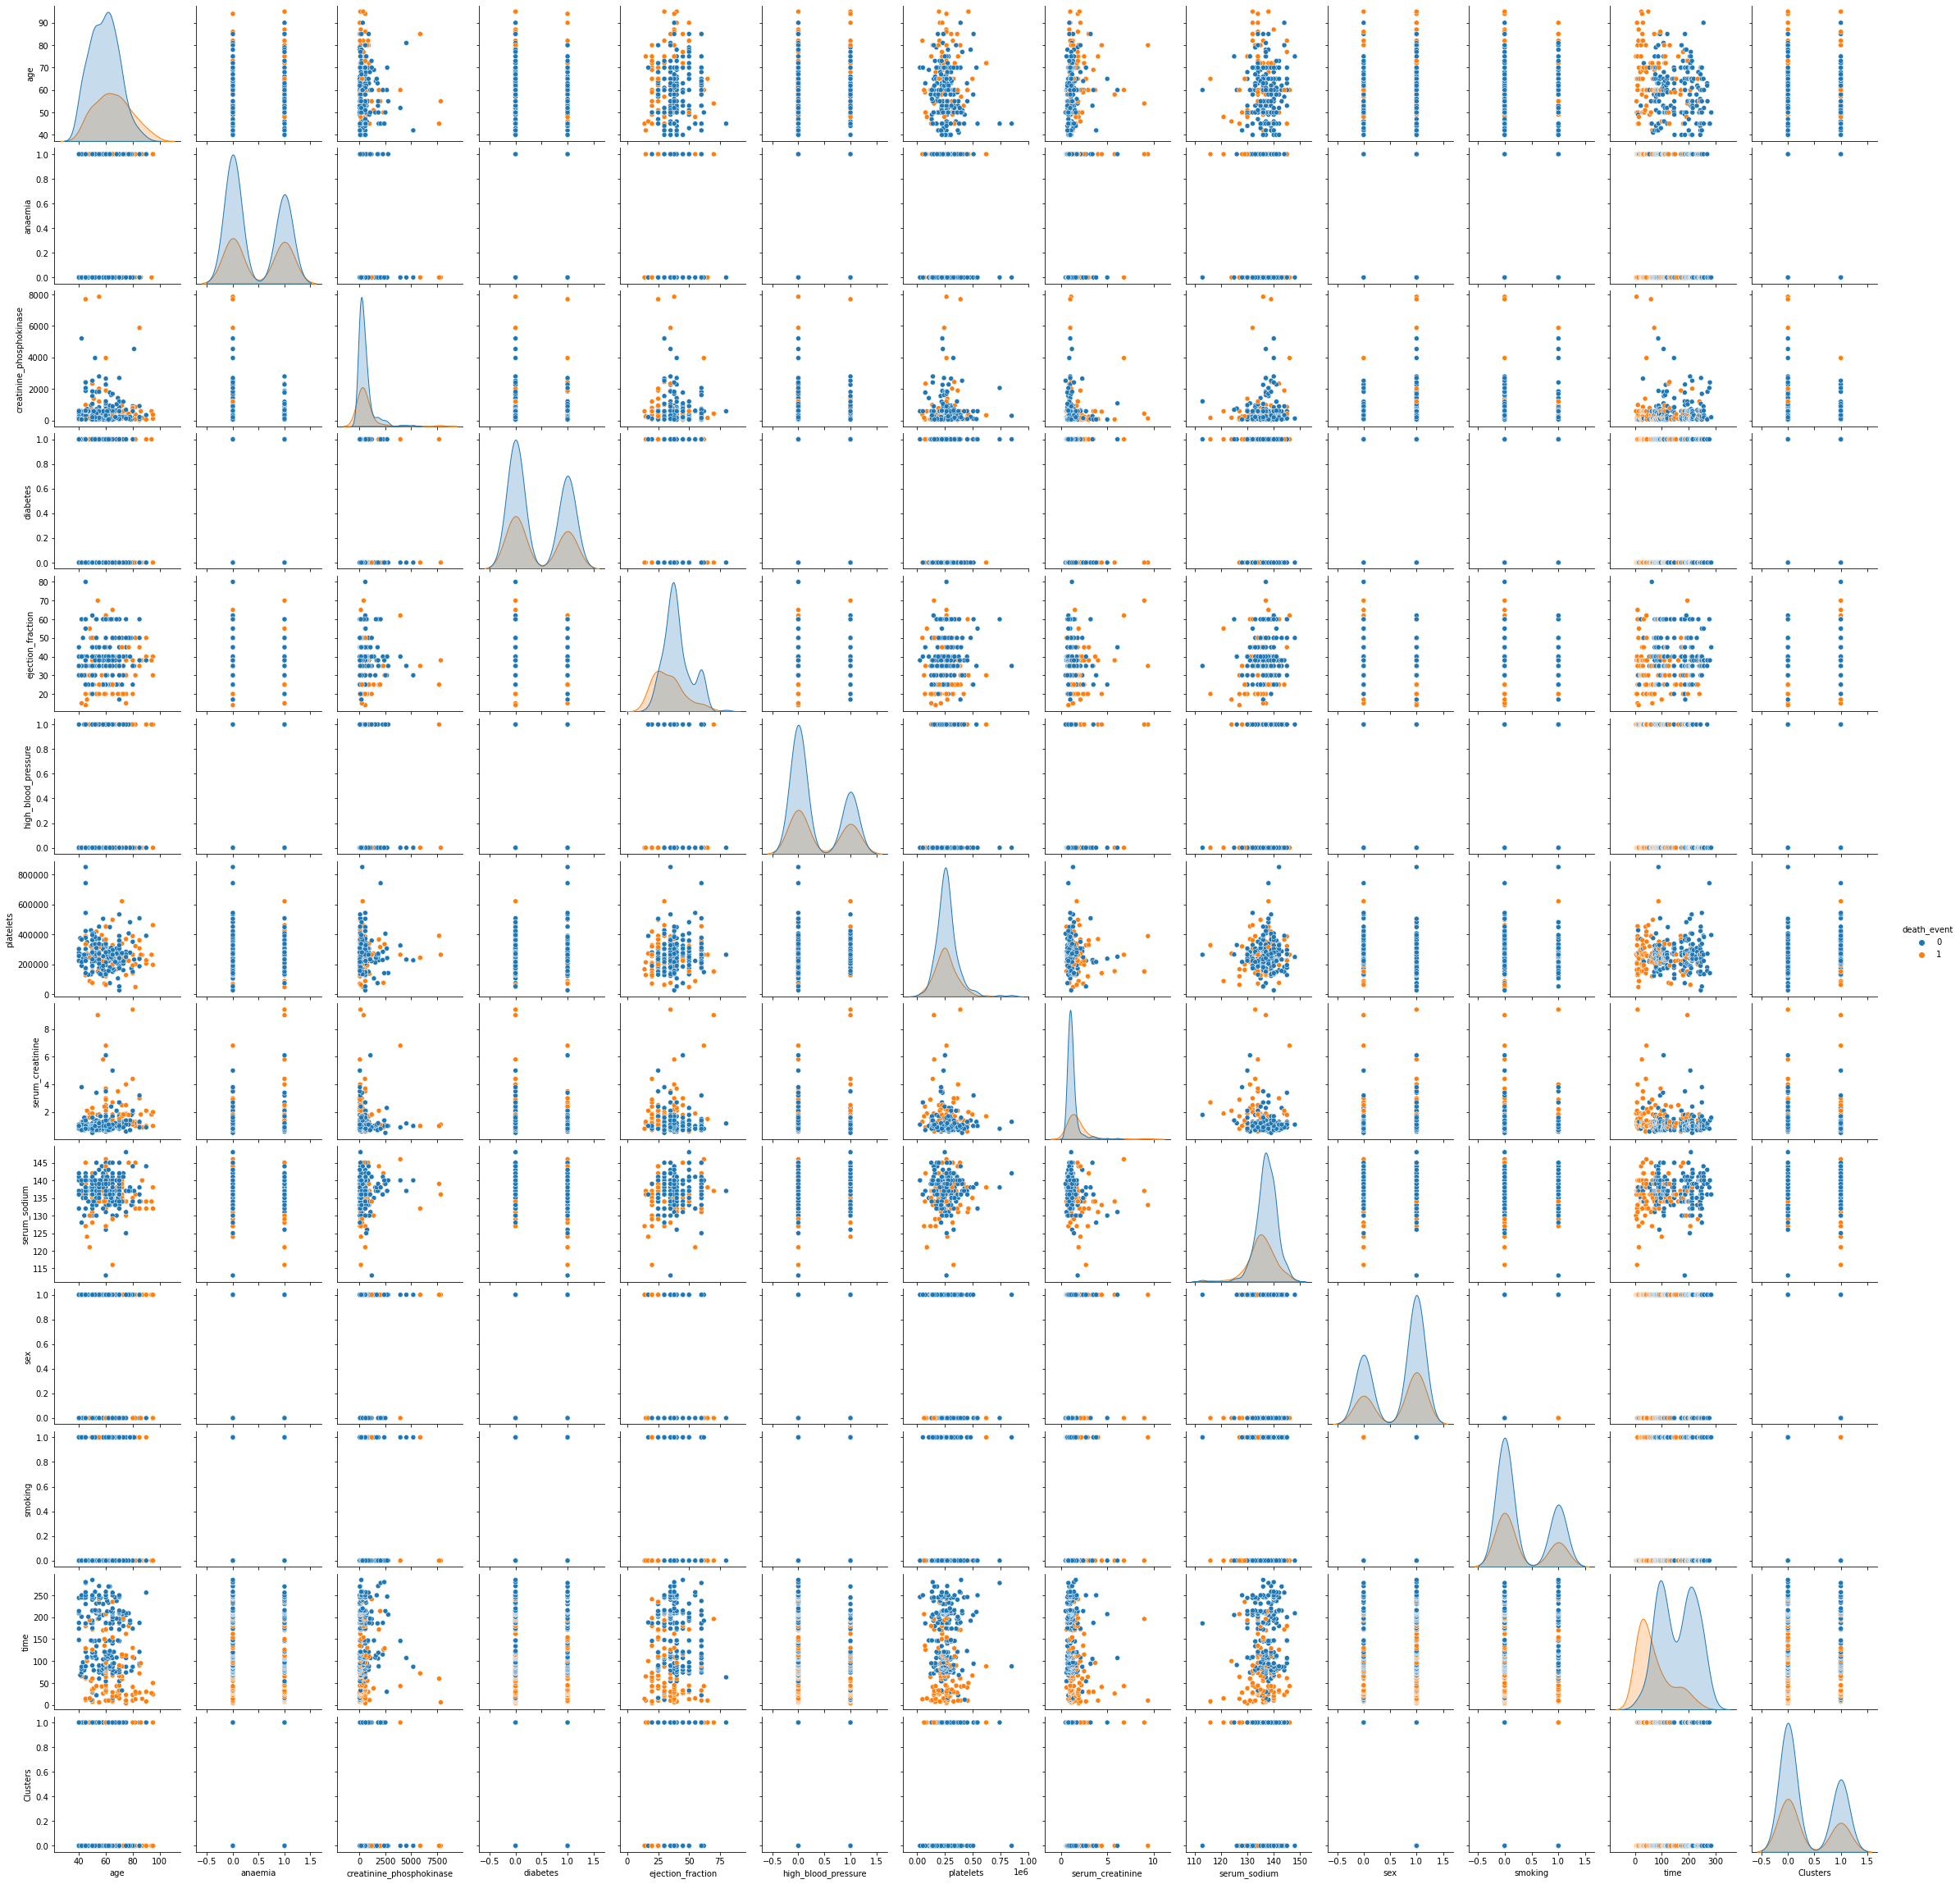

In [25]:
import seaborn as sns
sns.pairplot(data=df, hue = "death_event")

# Вывод:
В ходе выполнения работы для кластеризации было произведено разделение объектов на группы, реализованы два метода: иерархический агломеративный метод и метод k – средних, они отличаются тем, что первый не требует заданного числа кластеров, в отличие от второго, также метод k – средних группирует объекты пошагово, так как известно число кластеров, а иерархическая агломеративная кластеризация вычисляет расстояние попарно между двумя объектами и объединяет близкие кластеры.